# PS7 | Muath Hamidi

In [27]:
#==================================================
# Course: PHYS 512
# Problem: PS7
#==================================================
# By: Muath Hamidi
# Email: muath.hamidi@mail.mcgill.ca
# Department of Physics, McGill University
# November 2022

#==================================================
# Libraries
#==================================================
import numpy as np # For math
import matplotlib.pyplot as plt # For graphs
import random


# Problem 1

C:\Users\moath\AppData\Local\Temp\ipykernel_204\3383929633.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



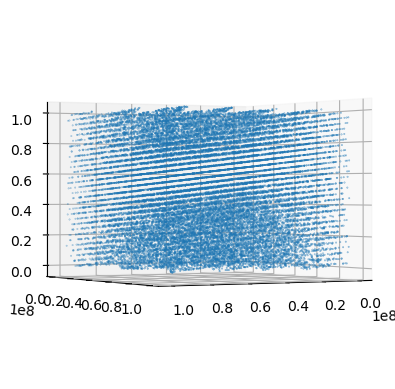

In [39]:
#==================================================
# Data
#==================================================
Data = np.loadtxt("rand_points.txt")

X = Data[:,0]
Y = Data[:,1]
Z = Data[:,2]

#==================================================
# Plot
#==================================================
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, s=0.1)
ax.view_init(0, 60)
fig.show()


I run it on Spyder's interactive window for plots, and counted nearly 30 plane. Here is shown an example for ($\phi$,$\theta$)=(0,60). I couldn't run the "libc.dylib". Here is an alternative;

C:\Users\moath\AppData\Local\Temp\ipykernel_204\3711461019.py:23: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



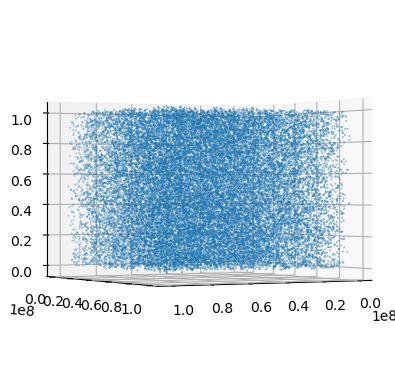

In [41]:
#==================================================
# Random Points Generation
#==================================================
Rand_Points = np.zeros(Data.shape)
N = Rand_Points.shape[0]

for i in range(N):
    Rand_Points[i,0] = random.randint(0,10**8)
    Rand_Points[i,1] = random.randint(0,10**8)
    Rand_Points[i,2] = random.randint(0,10**8)

X = Rand_Points[:,0]
Y = Rand_Points[:,1]
Z = Rand_Points[:,2]

#==================================================
# Plot
#==================================================
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, s=0.1)
ax.view_init(0, 60)
fig.show()


I also run it on Spyder's interactive window for plots, but there was no planes. So, python's random number generator is different than the C's.

# Problem 2

We can use rejection if our distribution covers the function we use. Here, let's see the functions first;

In [99]:
#==================================================
# Functions
#==================================================
def Lorentzian(x, a):
    return a/(1+x**2)

def Gaussian(x, a, s):
    return a*np.exp(-1/2*x**2/s**2)

def power(x, a, k):
    return a*(x+1)**(-k)

def exp(x):
    return np.exp(x)

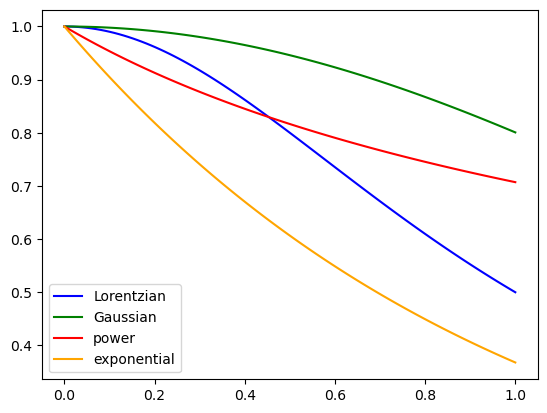

In [106]:
#==================================================
# Plot
#==================================================
x = np.linspace(0, 1, 100)

plt.plot(x, Lorentzian(x, 1), color="blue", label="Lorentzian")
plt.plot(x, Gaussian(x, 1, 1.5), color="green", label="Gaussian")
plt.plot(x, power(x, 1, 0.5), color="red", label="power")
plt.plot(x, exp(-x), color="orange", label="exponential")
plt.legend()


It seems that the exponential is well covered. However, in more far region;

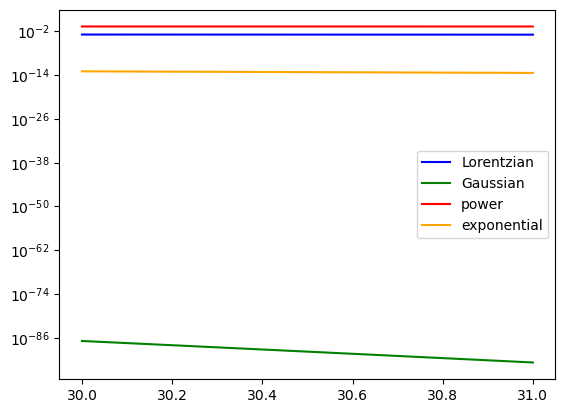

In [105]:
#==================================================
# Plot
#==================================================
x = np.linspace(30, 31, 100)

plt.plot(x, Lorentzian(x, 1), color="blue", label="Lorentzian")
plt.plot(x, Gaussian(x, 1, 1.5), color="green", label="Gaussian")
plt.plot(x, power(x, 1, 0.5), color="red", label="power")
plt.plot(x, exp(-x), color="orange", label="exponential")
plt.yscale('log')
plt.legend()

As you see, the Gaussian vanishes much faster and doesn't cover the exponential. So, it fails. We can use the Lorentzians, and power laws for the bounding distribution. First, the power distribution;

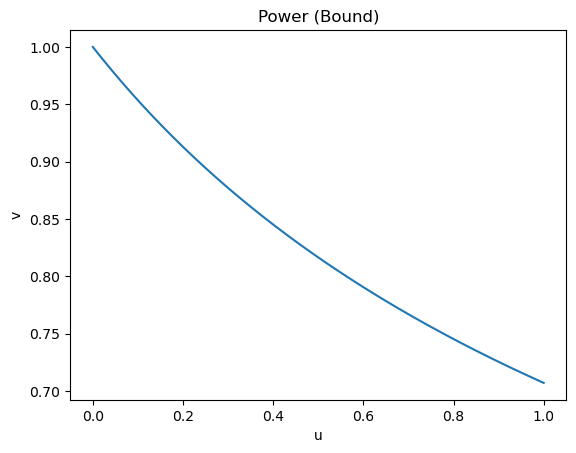

Acceptance:  0.2500476


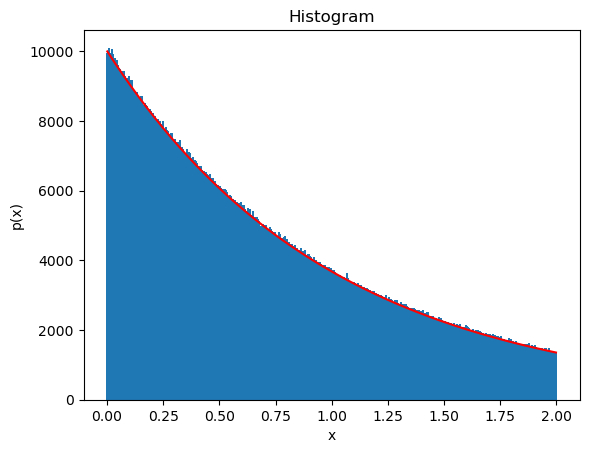

In [192]:
#==================================================
# Plot 1
#==================================================
u=np.linspace(0,1,1001)
v=power(u, 1, 0.5)

# plot
plt.figure(1)
plt.title("Power (Bound)")
plt.ylabel("v")
plt.xlabel("u")
plt.plot(u,v)
plt.show()

#==================================================
# Plot 2
#==================================================
N=20000000 # iterations
u=np.random.rand(N)
v=(np.random.rand(N))*v.max()
r=v/u # ratio
accept=u<np.exp(-r)
print("Acceptance: ", np.mean(accept))
exponential=r[accept]

a,b=np.histogram(exponential,np.linspace(0,1,1001)) # historgram

# prediction
bb=(b[1:]+b[:-1])
pred = np.exp(-bb) * np.sum(accept) * (bb[2] -bb[1])

# plot
plt.figure(2)
plt.title("Histogram")
plt.ylabel("p(x)")
plt.xlabel("x")
plt.bar(bb,a,0.01)
plt.plot(bb,pred,"red")
plt.show()

The Lorentzian distribution;

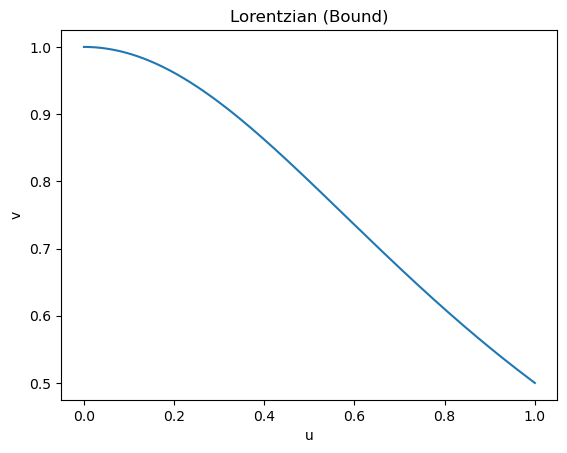

Acceptance:  0.25001315


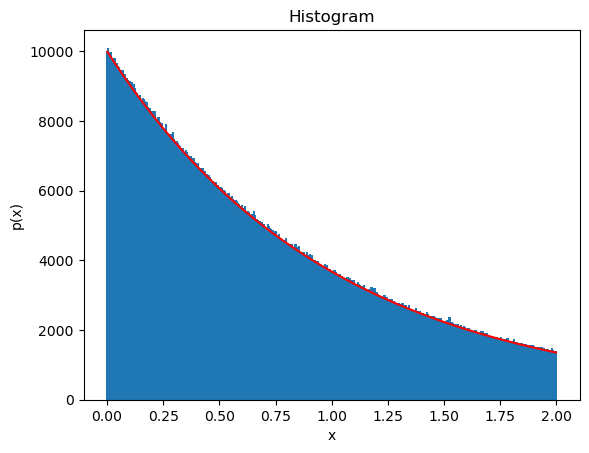

In [193]:
#==================================================
# Plot 1
#==================================================
u=np.linspace(0,1,1001)
v=Lorentzian(u, 1)

# plot
plt.figure(1)
plt.title("Lorentzian (Bound)")
plt.ylabel("v")
plt.xlabel("u")
plt.plot(u,v)
plt.show()

#==================================================
# Plot 2
#==================================================
N=20000000 # iterations
u=np.random.rand(N)
v=(np.random.rand(N))*v.max()
r=v/u # ratio
accept=u<np.exp(-r)
print("Acceptance: ", np.mean(accept))
exponential=r[accept]

a,b=np.histogram(exponential,np.linspace(0,1,1001)) # historgram

# prediction
bb=(b[1:]+b[:-1])
pred = np.exp(-bb) * np.sum(accept) * (bb[2] -bb[1])

# plot
plt.figure(2)
plt.title("Histogram")
plt.ylabel("p(x)")
plt.xlabel("x")
plt.bar(bb,a,0.01)
plt.plot(bb,pred,"red")
plt.show()

The acceptance is 0.25 for both.

# Problem 3

The Acceptance we expect to get here is:
$\int_{0}^{1}{vdu}/(uv)_{max}=(1/2)/(2/e)=e/4=0.67957$

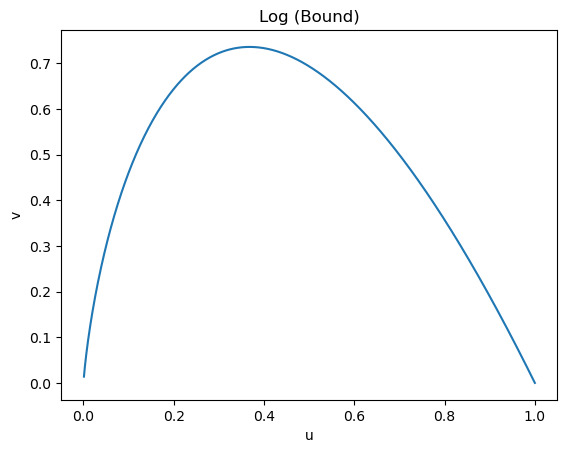

Acceptance:  0.67957085


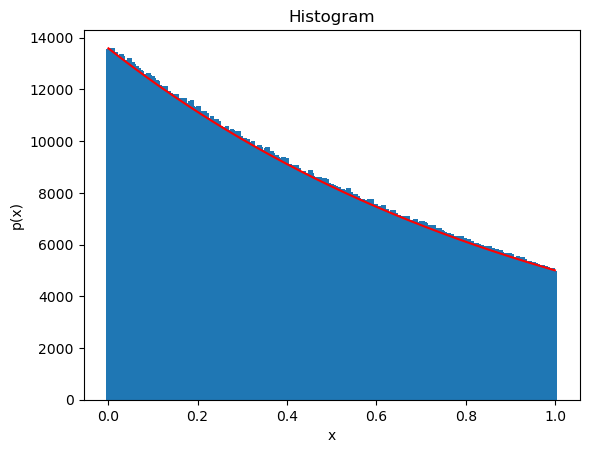

In [200]:
#==================================================
# Plot 1
#==================================================
u=np.linspace(0,1,1001)
u=u[1:]

v=-2*u*np.log(u)

# plot it
plt.figure(1)
plt.title("Log (Bound)")
plt.ylabel("v")
plt.xlabel("u")
plt.plot(u,v) 
plt.show()

#==================================================
# Plot 2
#==================================================
N=20000000 # iterations
u=np.random.rand(N)
v=(np.random.rand(N))*v.max()
r=v/u # ratio
accept=u<np.exp(-r/2)
print("Acceptance: ", np.mean(accept))
exponential=r[accept]

a,b=np.histogram(exponential,np.linspace(0,1,1001)) # historgram

# prediction
bb=0.5*(b[1:]+b[:-1])
pred = np.exp(-bb) * np.sum(accept) * (bb[2] -bb[1])

# plot
plt.figure(2)
plt.title("Histogram")
plt.ylabel("p(x)")
plt.xlabel("x")
plt.bar(bb,a,0.01)
plt.plot(bb,pred,"red")
plt.show()

Which matches the theory.